# Speech Model

In [32]:
import pandas as pd
import numpy as np
import os
import sys
import tensorflow as tf
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Audio
import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization,LSTM
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [33]:
Ravdess = "G:\\Baza_danych\\RAVDESS\\audio_speech_actors_01-24"
Crema = "G:\\Baza_danych\\CREMA\\AudioWAV"
Tess = "G:\\Baza_danych\\\\TESS\\TESSTorontoemotionalspeechsetdata\\TESSTorontoemotionalspeechsetdata1"
Savee = "G:\\Baza_danych\\SAVEE\\AudioData\\AudioData1"

In [34]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor_path = os.path.join(Ravdess, dir)
    actor = os.listdir(actor_path)
    for file in actor:
        file_path.append(os.path.join(actor_path, file))
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
print(Ravdess_df.Emotions.value_counts())
Ravdess_df

Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dtype: int64


,Emotions,Path
0,neutral,G:\Baza_danych\RAVDESS\audio_speech_actors_01-...
1,neutral,G:\Baza_danych\RAVDESS\audio_speech_actors_01-...
2,neutral,G:\Baza_danych\RAVDESS\audio_speech_actors_01-...
3,neutral,G:\Baza_danych\RAVDESS\audio_speech_actors_01-...
4,neutral,G:\Baza_danych\RAVDESS\audio_speech_actors_01-...
...,...,...
1435,surprise,G:\Baza_danych\RAVDESS\audio_speech_actors_01-...
1436,surprise,G:\Baza_danych\RAVDESS\audio_speech_actors_01-...
1437,surprise,G:\Baza_danych\RAVDESS\audio_speech_actors_01-...
1438,surprise,G:\Baza_danych\RAVDESS\audio_speech_actors_01-...


In [35]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    file_path.append(Crema + "\\" + file)
    part = file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
print(Crema_df.Emotions.value_counts())
Crema_df

Emotions
angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64


,Emotions,Path
0,angry,G:\Baza_danych\CREMA\AudioWAV\1001_DFA_ANG_XX.wav
1,disgust,G:\Baza_danych\CREMA\AudioWAV\1001_DFA_DIS_XX.wav
2,fear,G:\Baza_danych\CREMA\AudioWAV\1001_DFA_FEA_XX.wav
3,happy,G:\Baza_danych\CREMA\AudioWAV\1001_DFA_HAP_XX.wav
4,neutral,G:\Baza_danych\CREMA\AudioWAV\1001_DFA_NEU_XX.wav
...,...,...
7437,disgust,G:\Baza_danych\CREMA\AudioWAV\1091_WSI_DIS_XX.wav
7438,fear,G:\Baza_danych\CREMA\AudioWAV\1091_WSI_FEA_XX.wav
7439,happy,G:\Baza_danych\CREMA\AudioWAV\1091_WSI_HAP_XX.wav
7440,neutral,G:\Baza_danych\CREMA\AudioWAV\1091_WSI_NEU_XX.wav


In [36]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directory_path = os.path.join(Tess, dir)
    if os.path.isdir(directory_path):
        directories = os.listdir(directory_path)
        for file in directories:
            if file != 'desktop.ini':
                part = file.split('.')[0]
                part = part.split('_')[2]
                if part == 'ps':
                    file_emotion.append('surprise')
                else:
                    file_emotion.append(part)
                file_path.append(os.path.join(directory_path, file))


emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
print(Tess_df.Emotions.value_counts())
Tess_df

Emotions
angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: count, dtype: int64


,Emotions,Path
0,angry,G:\Baza_danych\\TESS\TESSTorontoemotionalspeec...
1,angry,G:\Baza_danych\\TESS\TESSTorontoemotionalspeec...
2,angry,G:\Baza_danych\\TESS\TESSTorontoemotionalspeec...
3,angry,G:\Baza_danych\\TESS\TESSTorontoemotionalspeec...
4,angry,G:\Baza_danych\\TESS\TESSTorontoemotionalspeec...
...,...,...
2795,sad,G:\Baza_danych\\TESS\TESSTorontoemotionalspeec...
2796,sad,G:\Baza_danych\\TESS\TESSTorontoemotionalspeec...
2797,sad,G:\Baza_danych\\TESS\TESSTorontoemotionalspeec...
2798,sad,G:\Baza_danych\\TESS\TESSTorontoemotionalspeec...


In [37]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for dir in savee_directory_list: 
    actor_path = os.path.join(Savee, dir)
    actor = os.listdir(actor_path)
    for file in actor:
        file_path.append(os.path.join(actor_path, file))
        part = file.split('.')[0]
        ele = part[:-2]
        if ele == 'a':
            file_emotion.append('angry')
        elif ele == 'd':
            file_emotion.append('disgust')
        elif ele == 'f':
            file_emotion.append('fear')
        elif ele == 'h':
            file_emotion.append('happy')
        elif ele == 'n':
            file_emotion.append('neutral')
        elif ele == 'sa':
            file_emotion.append('sad')
        else:
            file_emotion.append('surprise')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
print(Savee_df.Emotions.value_counts())
Savee_df

Emotions
neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: count, dtype: int64


,Emotions,Path
0,angry,G:\Baza_danych\SAVEE\AudioData\AudioData1\DC\a...
1,angry,G:\Baza_danych\SAVEE\AudioData\AudioData1\DC\a...
2,angry,G:\Baza_danych\SAVEE\AudioData\AudioData1\DC\a...
3,angry,G:\Baza_danych\SAVEE\AudioData\AudioData1\DC\a...
4,angry,G:\Baza_danych\SAVEE\AudioData\AudioData1\DC\a...
...,...,...
475,surprise,G:\Baza_danych\SAVEE\AudioData\AudioData1\KL\s...
476,surprise,G:\Baza_danych\SAVEE\AudioData\AudioData1\KL\s...
477,surprise,G:\Baza_danych\SAVEE\AudioData\AudioData1\KL\s...
478,surprise,G:\Baza_danych\SAVEE\AudioData\AudioData1\KL\s...


In [9]:
df_questionnaire = pd.read_csv('dataset.csv')
df_questionnaire = df_questionnaire.loc[df_questionnaire['Type'] == 'speech']
df_questionnaire.rename(columns={'Paths': 'Path'}, inplace=True)
df_questionnaire

,Directory,Path,Emotions,Age,Sex,Question,Colors,Type
0,1,G:\Baza_danych\nagrania\output\1\speech\001.wav,happy,26,female,no,"(253, 212, 1)",speech
1,1,G:\Baza_danych\nagrania\output\1\speech\001.wav,happy,26,female,no,"(255, 233, 123)",speech
2,1,G:\Baza_danych\nagrania\output\1\speech\001.wav,happy,26,female,no,"(254, 183, 101)",speech
3,1,G:\Baza_danych\nagrania\output\1\speech\002.wav,angry,26,female,no,"(149, 47, 180)",speech
4,1,G:\Baza_danych\nagrania\output\1\speech\002.wav,angry,26,female,no,"(206, 129, 230)",speech
...,...,...,...,...,...,...,...,...
2539,141,G:\Baza_danych\nagrania\output\141\speech\003.wav,neutral,18,female,no,"(107, 184, 52)",speech
2540,141,G:\Baza_danych\nagrania\output\141\speech\004.wav,sad,18,female,no,"(46, 91, 210)",speech
2541,141,G:\Baza_danych\nagrania\output\141\speech\005.wav,fear,18,female,no,"(238, 0, 18)",speech
2542,141,G:\Baza_danych\nagrania\output\141\speech\005.wav,fear,18,female,no,"(238, 0, 18)",speech


In [11]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df, df_questionnaire[['Emotions', 'Path']]], axis = 0)
# data_path.to_csv("data_path.csv",index=False)

data_path = data_path[data_path['Emotions'] != 'surprise']

print(data_path.Emotions.value_counts())
data_path.reset_index(drop=True, inplace=True)
data_path

Emotions
neutral    2414
fear       2195
angry      2161
sad        2085
disgust    2070
happy      2015
Name: count, dtype: int64


,Emotions,Path
0,neutral,G:\Baza_danych\RAVDESS\audio_speech_actors_01-...
1,neutral,G:\Baza_danych\RAVDESS\audio_speech_actors_01-...
2,neutral,G:\Baza_danych\RAVDESS\audio_speech_actors_01-...
3,neutral,G:\Baza_danych\RAVDESS\audio_speech_actors_01-...
4,neutral,G:\Baza_danych\RAVDESS\audio_speech_actors_01-...
...,...,...
12935,neutral,G:\Baza_danych\nagrania\output\141\speech\003.wav
12936,sad,G:\Baza_danych\nagrania\output\141\speech\004.wav
12937,fear,G:\Baza_danych\nagrania\output\141\speech\005.wav
12938,fear,G:\Baza_danych\nagrania\output\141\speech\005.wav


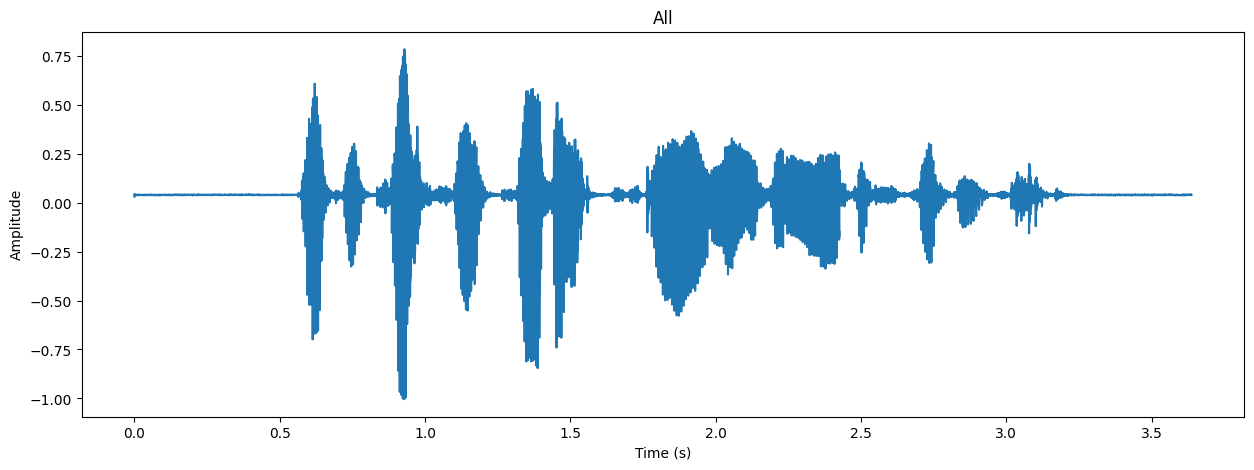

In [12]:
fname = data_path['Path'].iloc[11368]
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
plt.plot(np.arange(0, len(data)) / sampling_rate, data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('All')
plt.show()

Audio(fname)

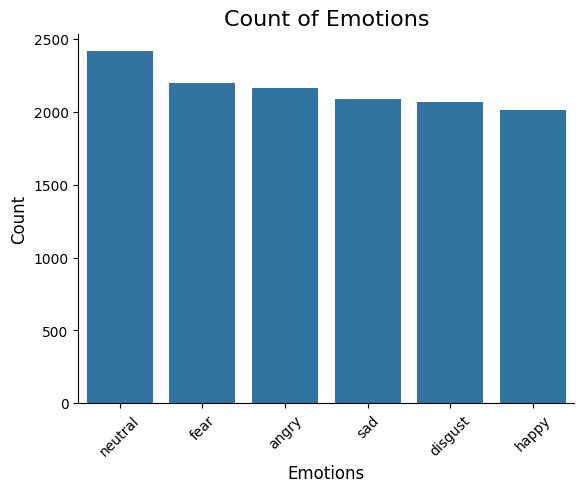

In [13]:
plt.title('Count of Emotions', size=16)
sns.barplot(x=data_path['Emotions'].value_counts().index, y=data_path['Emotions'].value_counts())
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [14]:
def noise(data, noise_rate=0.015): 
    noise_amp = noise_rate * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size = data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)
    
def shift(data):
    shift_range = int(np.random.uniform(low =- 5, high = 5) * 1000)
    return np.roll(data, shift_range)

def pitch(data, sr=sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

In [15]:
def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

In [16]:
fname = file_path[0]
data, sampling_rate = librosa.load(fname, duration=2.5, offset=0.6)
print("ZCR: ", zcr(data).shape)
print("RMS :", rmse(data).shape)
print("MFCC: ", mfcc(data, sampling_rate).shape)

ZCR:  (108,)
RMS : (108,)
MFCC:  (2160,)


In [17]:
def extract_features(data, sr, frame_length = 2048, hop_length = 512):
    result = np.array([])
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        rmse(data, frame_length, hop_length),
                        mfcc(data, sr, frame_length, hop_length)
                                    ))
    return result

In [18]:
fname = file_path[0]
data, sampling_rate = librosa.load(fname, duration=2.5, offset=0.6)
extract_features(data, sampling_rate)

array([ 1.31835938e-02,  2.00195312e-02,  2.53906250e-02, ...,
        6.08748674e+00,  2.71901941e+00, -2.14157810e+01])

In [19]:
def get_features(path):
    data, sampling_rate = librosa.load(path, duration = 2.5, offset = 0.6)
    
    res1 = extract_features(data,sampling_rate)
    result = np.array(res1)
    
    noise_data = noise(data)
    res2 = extract_features(noise_data, sampling_rate)
    result = np.vstack((result, res2)) 
    
    data_pitch = pitch(data, sampling_rate)
    res3 = extract_features(data_pitch, sampling_rate)
    result = np.vstack((result, res3)) 
    
    data_noise_pitch = noise(data_pitch)
    res4 = extract_features(data_noise_pitch, sampling_rate)
    result = np.vstack((result, res4)) 
    
    return result

In [18]:
X, Y = [], []
i = 0

for path, emotion in zip(data_path.Path, data_path.Emotions):
    i = i+1
    feature = get_features(path)
    print(i)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [19]:
len(X), len(Y), data_path.Path.shape

(51760, 51760, (12940,))

In [20]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features_speech_emotion.csv', index=False)
Features

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,labels
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.766315,0.755441,0.743671,0.731043,0.717561,0.703260,0.688124,0.672208,0.655518,neutral
1,0.241211,0.365234,0.483887,0.491699,0.490234,0.472168,0.472656,0.462402,0.476074,0.492676,...,-0.436413,2.224611,0.237031,-1.761743,3.228909,2.180535,-1.187781,-1.355257,-1.118529,neutral
2,0.256348,0.354492,0.471191,0.414062,0.378418,0.373535,0.354492,0.408691,0.466797,0.522461,...,0.006713,0.006601,0.006483,0.006356,0.006218,0.006066,0.005919,0.005759,0.005588,neutral
3,0.249023,0.373535,0.485840,0.482422,0.484375,0.483887,0.490234,0.498047,0.501465,0.525391,...,1.465924,1.003237,-1.810043,-0.065157,0.244814,0.055016,1.069867,2.041262,-0.305813,neutral
4,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51755,0.031250,0.039062,0.045898,0.027344,0.037598,0.040039,0.053711,0.088867,0.162109,0.217773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear
51756,0.008789,0.014160,0.022949,0.030273,0.048340,0.058105,0.068359,0.077148,0.076172,0.076660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear
51757,0.008789,0.014160,0.022949,0.029297,0.047363,0.057129,0.067383,0.077148,0.076172,0.076660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear
51758,0.009277,0.014648,0.023926,0.035156,0.058105,0.074707,0.088379,0.091797,0.082520,0.081543,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fear


In [39]:
Features = pd.read_csv('features_speech_emotion.csv')
print(Features.shape)

(51760, 2377)


In [40]:
Features = Features.fillna(0)
print(Features.isna().any())
Features.shape

0         False
1         False
2         False
3         False
4         False
          ...  
2372      False
2373      False
2374      False
2375      False
labels    False
Length: 2377, dtype: bool


(51760, 2377)

In [41]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [42]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
encoder.categories_

[array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad'],
       dtype=object)]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.15, random_state=30, shuffle=True,stratify=Y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((43996, 2376), (43996, 6), (7764, 2376), (7764, 6))

In [44]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, random_state=30, test_size=0.25, shuffle=True,stratify=y_test)
x_train.shape, x_test.shape, x_val.shape, x_train.shape, x_test.shape, x_val.shape

((43996, 2376),
 (5823, 2376),
 (1941, 2376),
 (43996, 2376),
 (5823, 2376),
 (1941, 2376))

In [45]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test = scaler.transform(x_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((43996, 2376), (43996, 6), (5823, 2376), (5823, 6))

In [46]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_val = np.expand_dims(x_val, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((43996, 2376, 1), (43996, 6), (5823, 2376, 1), (5823, 6))

In [47]:
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

In [48]:
model=Sequential()

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(6, activation='softmax'))
model.compile(optimizer = 'Adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 2376, 256)         1536      
                                                                 
 batch_normalization_5 (Bat  (None, 2376, 256)         1024      
 chNormalization)                                                
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 1188, 256)         0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 1188, 256)         327936    
                                                                 
 batch_normalization_6 (Bat  (None, 1188, 256)         1024      
 chNormalization)                                                
                                                      

In [49]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
callbacks=[learning_rate_reduction]

In [51]:
history=model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val), callbacks=callbacks)

Epoch 1/50
1375/1375 [==============================] - 1050s 764ms/step - loss: 1.4291 - accuracy: 0.4340 - val_loss: 1.2491 - val_accuracy: 0.5039 - lr: 0.0010
Epoch 2/50
1375/1375 [==============================] - 1042s 758ms/step - loss: 1.2333 - accuracy: 0.5240 - val_loss: 1.1828 - val_accuracy: 0.5425 - lr: 0.0010
Epoch 3/50
1375/1375 [==============================] - 1002s 729ms/step - loss: 1.1457 - accuracy: 0.5599 - val_loss: 1.1866 - val_accuracy: 0.5389 - lr: 0.0010
Epoch 4/50
1375/1375 [==============================] - 1065s 774ms/step - loss: 1.0790 - accuracy: 0.5869 - val_loss: 1.0221 - val_accuracy: 0.6007 - lr: 0.0010
Epoch 5/50
1375/1375 [==============================] - 1041s 757ms/step - loss: 1.0101 - accuracy: 0.6146 - val_loss: 0.9996 - val_accuracy: 0.6301 - lr: 0.0010
Epoch 6/50
1375/1375 [==============================] - 1107s 805ms/step - loss: 0.9465 - accuracy: 0.6413 - val_loss: 0.9691 - val_accuracy: 0.6239 - lr: 0.0010
Epoch 7/50
1375/1375 [======

In [52]:
from keras.models import load_model
model.save('model_speech.h5')

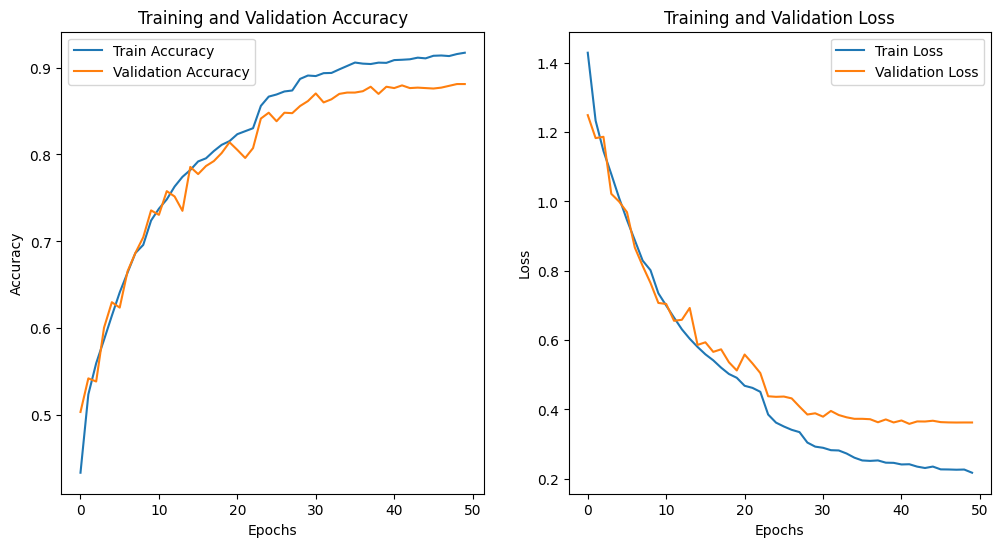

In [53]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [54]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

In [55]:
print("test_accuracy:", round(test_accuracy,4))
print("test_loss:", round(test_loss,4))

test_accuracy: 0.8803
test_loss: 0.3646


In [56]:
pred_test = model.predict(x_test)

y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test) 

182/182 [==============================] - 23s 119ms/step


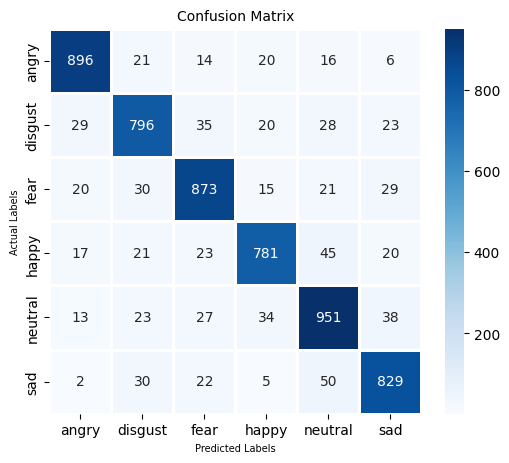

In [57]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 5))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=10)
plt.xlabel('Predicted Labels', size=7)
plt.ylabel('Actual Labels', size=7)
plt.show()

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.92      0.92      0.92       973
     disgust       0.86      0.85      0.86       931
        fear       0.88      0.88      0.88       988
       happy       0.89      0.86      0.88       907
     neutral       0.86      0.88      0.87      1086
         sad       0.88      0.88      0.88       938

    accuracy                           0.88      5823
   macro avg       0.88      0.88      0.88      5823
weighted avg       0.88      0.88      0.88      5823



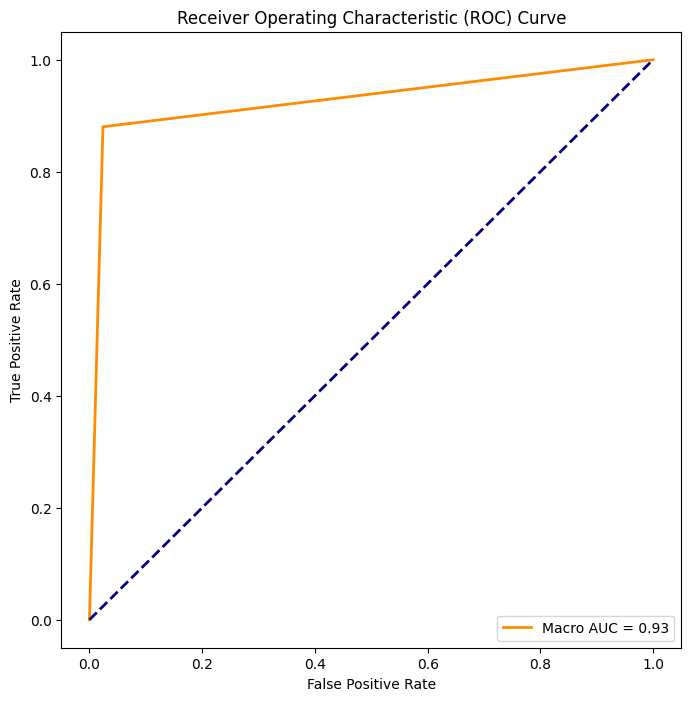

In [61]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, roc_curve

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = lb.transform(y_pred)

roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro')

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Macro AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [59]:
import pickle

with open('history_speech.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [62]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(20)

,Predicted Labels,Actual Labels
0,happy,happy
1,neutral,angry
2,sad,fear
3,sad,neutral
4,happy,happy
5,neutral,neutral
6,neutral,neutral
7,angry,angry
8,angry,angry
9,neutral,neutral


In [63]:
data = {
    'Emotions': ['happy', 'angry', 'neutral', 'sad', 'fear', 'disgust'],
    'Jasno pomarańczowy': [6, 6, 10, 0, 2, 3],
    'Czerwony': [9, 78, 5, 2, 19, 2],
    'Biały': [0, 3, 34, 2, 3, 2],
    'Ciemno pomarańczowy': [3, 13, 9, 1, 6, 9],
    'Granatowy': [0, 5, 21, 20, 19, 9],
    'Ciemno czerwony': [1, 20, 5, 0, 11, 4],
    'Zielony': [16, 3, 57, 1, 8, 12],
    'Czarny': [1, 9, 5, 3, 12, 1],
    'Żółty': [19, 9, 29, 6, 8, 10],
    'Jasno szary': [0, 0, 53, 14, 11, 6],
    'Niebieski': [4, 2, 36, 14, 14, 8],
    'Jasno niebieski': [3, 0, 18, 9, 8, 2],
    'Jasno jasno niebieski': [0, 1, 34, 9, 3, 3],
    'Pomarańczowy': [16, 27, 19, 1, 13, 5],
    'Ciemno szary': [2, 12, 64, 20, 38, 19],
    'Fioletowy': [2, 9, 10, 7, 17, 7],
    'Jasno żółty': [6, 0, 13, 1, 4, 7],
    'Jasno jasno czerwony': [1, 8, 9, 0, 1, 1],
    'Jasno granatowy': [0, 3, 7, 20, 7, 4],
    'Jasno czerwony': [1, 14, 3, 0, 5, 6],
    'Ciemno granatowy': [0, 3, 2, 3, 15, 3],
    'Ciemno żółty': [0, 2, 4, 2, 7, 14],
    'Jasno zielony': [4, 3, 18, 0, 3, 3],
    'Jasno jasno żółty': [0, 2, 14, 2, 3, 0],
    'Jasno fioletowy': [2, 2, 3, 2, 3, 2],
    'Ciemno zielony': [1, 3, 3, 1, 8, 8],
    'Jasno jasno pomarańczowy': [0, 1, 11, 5, 0, 0],
    'Ciemno niebieski': [0, 5, 1, 10, 12, 3],
    'Jasno jasno granatowy': [0, 0, 16, 7, 5, 2],
    'Ciemno fioletowy': [0, 10, 3, 3, 14, 1],
    'Jasno jasno zielony': [1, 1, 21, 0, 6, 3],
    'Jasno jasno fioletowy': [2, 0, 2, 3, 5, 2],
    'Cienno fioletowy': [0, 0, 0, 0, 0, 0]
}

df_col = pd.DataFrame(data)

emotions = df_col['Emotions']
colors = df_col.columns[1:]
probabilities = {}

for emotion in emotions:
    total_occurrences = df_col[df_col['Emotions'] == emotion][colors].sum().sum()
    probabilities[emotion] = {}
    for color in colors:
        color_occurrences = df_col.loc[df_col['Emotions'] == emotion, color].sum()
        probabilities[emotion][color] = color_occurrences / total_occurrences

probabilities_df = pd.DataFrame(probabilities).T
probabilities_df

,Jasno pomarańczowy,Czerwony,Biały,Ciemno pomarańczowy,Granatowy,Ciemno czerwony,Zielony,Czarny,Żółty,Jasno szary,...,Jasno jasno żółty,Jasno fioletowy,Ciemno zielony,Jasno jasno pomarańczowy,Ciemno niebieski,Jasno jasno granatowy,Ciemno fioletowy,Jasno jasno zielony,Jasno jasno fioletowy,Cienno fioletowy
happy,0.060000,0.090000,0.000000,0.030000,0.000000,0.010000,0.160000,0.010000,0.190000,0.000000,...,0.000000,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.020000,0.0
angry,0.023622,0.307087,0.011811,0.051181,0.019685,0.078740,0.011811,0.035433,0.035433,0.000000,...,0.007874,0.007874,0.011811,0.003937,0.019685,0.000000,0.039370,0.003937,0.000000,0.0
neutral,0.018553,0.009276,0.063080,0.016698,0.038961,0.009276,0.105751,0.009276,0.053803,0.098330,...,0.025974,0.005566,0.005566,0.020408,0.001855,0.029685,0.005566,0.038961,0.003711,0.0
sad,0.000000,0.011905,0.011905,0.005952,0.119048,0.000000,0.005952,0.017857,0.035714,0.083333,...,0.011905,0.011905,0.005952,0.029762,0.059524,0.041667,0.017857,0.000000,0.017857,0.0
fear,0.006897,0.065517,0.010345,0.020690,0.065517,0.037931,0.027586,0.041379,0.027586,0.037931,...,0.010345,0.010345,0.027586,0.000000,0.041379,0.017241,0.048276,0.020690,0.017241,0.0
disgust,0.018634,0.012422,0.012422,0.055901,0.055901,0.024845,0.074534,0.006211,0.062112,0.037267,...,0.000000,0.012422,0.049689,0.000000,0.018634,0.012422,0.006211,0.018634,0.012422,0.0


In [64]:
df_head = df.head(20)
df_head

,Predicted Labels,Actual Labels
0,happy,happy
1,neutral,angry
2,sad,fear
3,sad,neutral
4,happy,happy
5,neutral,neutral
6,neutral,neutral
7,angry,angry
8,angry,angry
9,neutral,neutral


In [65]:
probabilities_df_normalized = probabilities_df.div(probabilities_df.sum(axis=1), axis=0)

def sample_color(emotion):
    probabilities = probabilities_df_normalized.loc[emotion]
    return np.random.choice(probabilities.index, p=probabilities)


df_head['Colors'] = df_head['Predicted Labels'].apply(sample_color)

save_df = df_head

In [66]:
from collections import Counter

emotion_to_sample = 'happy'
num_samples = 1000

results = []

for _ in range(num_samples):
    sampled_color = sample_color(emotion_to_sample)
    results.append(sampled_color)

print(f"Emotion: {emotion_to_sample}")
print(f"Results after {num_samples} samples: {results}")

color_counts = Counter(results)
print("Color counts:")
for color, count in color_counts.items():
    print(f"{color}: {count} times")

Emotion: happy
Results after 1000 samples: ['Czerwony', 'Jasno żółty', 'Żółty', 'Czerwony', 'Jasno jasno czerwony', 'Jasno żółty', 'Żółty', 'Żółty', 'Niebieski', 'Pomarańczowy', 'Ciemno czerwony', 'Żółty', 'Ciemno pomarańczowy', 'Zielony', 'Zielony', 'Żółty', 'Zielony', 'Zielony', 'Pomarańczowy', 'Jasno niebieski', 'Niebieski', 'Żółty', 'Czerwony', 'Zielony', 'Żółty', 'Jasno pomarańczowy', 'Zielony', 'Jasno jasno zielony', 'Żółty', 'Żółty', 'Zielony', 'Ciemno szary', 'Zielony', 'Pomarańczowy', 'Ciemno szary', 'Zielony', 'Jasno żółty', 'Pomarańczowy', 'Pomarańczowy', 'Jasno pomarańczowy', 'Jasno fioletowy', 'Pomarańczowy', 'Jasno czerwony', 'Jasno żółty', 'Zielony', 'Zielony', 'Jasno zielony', 'Jasno żółty', 'Fioletowy', 'Zielony', 'Pomarańczowy', 'Jasno pomarańczowy', 'Pomarańczowy', 'Niebieski', 'Niebieski', 'Pomarańczowy', 'Ciemno szary', 'Niebieski', 'Zielony', 'Żółty', 'Niebieski', 'Fioletowy', 'Jasno zielony', 'Żółty', 'Jasno pomarańczowy', 'Żółty', 'Ciemno pomarańczowy', 'Jasno ż

In [67]:
save_df

,Predicted Labels,Actual Labels,Colors
0,happy,happy,Pomarańczowy
1,neutral,angry,Jasno jasno niebieski
2,sad,fear,Jasno granatowy
3,sad,neutral,Granatowy
4,happy,happy,Zielony
5,neutral,neutral,Jasno jasno granatowy
6,neutral,neutral,Jasno jasno niebieski
7,angry,angry,Czerwony
8,angry,angry,Czerwony
9,neutral,neutral,Ciemno szary


In [88]:
def color_cells(val):
    return f'background-color: {val}'


color_rgb_mapping = {
    'Biały': (247, 247, 247),
    'Jasno żółty': (255, 233, 123),
    'Ciemno szary': (118, 118, 118),
    'Ciemno granatowy': (28, 55, 126),
    'Jasno granatowy': (130, 157, 228),
    'Czarny': (0, 0, 0),
    'Jasno szary': (183, 183, 183),
    'Jasno niebieski': (130, 213, 228),
    'Ciemno pomarańczowy': (150, 81, 1),
    'Jasno jasno żółty': (255, 246, 203),
    'Czerwony': (238, 0, 18),
    'Żółty': (253, 212, 1),
    'Jasno pomarańczowy': (254, 183, 101),
    'Niebieski': (46, 186, 210),
    'Ciemno czerwony': (136, 0, 10),
    'Jasno fioletowy': (206, 129, 230),
    'Jasno jasno niebieski': (214, 244, 246),
    'Granatowy': (46, 91, 210),
    'Jasno jasno czerwony': (250, 101, 113),
    'Jasno zielony': (161, 217, 121),
    'Jasno jasno pomarańczowy': (255, 230, 202),
    'Ciemno fioletowy': (82, 26, 99),
    'Pomarańczowy': (251, 136, 2),
    'Fioletowy': (149, 47, 180),
    'Jasno niebieski': (130, 213, 228),
    'Zielony': (107, 184, 52),
    'Jasno jasno granatowy': (214, 223, 246),
    'Jasno czerwony': (250, 101, 113)  
}

df_head['Colors_RGB'] = df_head['Colors'].map(color_rgb_mapping).apply(lambda rgb: f'rgb{rgb}')
styled_df_rgb = df_head.style.applymap(color_cells, subset=['Colors_RGB'])
styled_df_rgb

,Predicted Labels,Actual Labels,Colors,Colors_RGB
0,happy,happy,Pomarańczowy,"rgb(251, 136, 2)"
1,neutral,angry,Jasno jasno niebieski,"rgb(214, 244, 246)"
2,sad,fear,Jasno granatowy,"rgb(130, 157, 228)"
3,sad,neutral,Granatowy,"rgb(46, 91, 210)"
4,happy,happy,Zielony,"rgb(107, 184, 52)"
5,neutral,neutral,Jasno jasno granatowy,"rgb(214, 223, 246)"
6,neutral,neutral,Jasno jasno niebieski,"rgb(214, 244, 246)"
7,angry,angry,Czerwony,"rgb(238, 0, 18)"
8,angry,angry,Czerwony,"rgb(238, 0, 18)"
9,neutral,neutral,Ciemno szary,"rgb(118, 118, 118)"
